In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as sk
import math
from sklearn import preprocessing
from scipy import stats

    Dropping features that seem irrelevant (such as ID) or that gives some kind of repeated information (such as usd_pledfed_real, usd_goal_real and category). Also removed backers because I didn't want to make my model influenced by it (but it is an actual valid information, maybe I will try again without removing it).

In [104]:
# df = pd.read_csv('ks-projects-201612.csv')
df2018 = pd.read_csv('ks-projects-201801.csv')

In [105]:
df2018.drop(['ID', 'name', 'pledged', 'usd_pledged_real', 'usd_goal_real', 'backers', 'category'], axis=1, inplace=True)
print df2018.shape

(378661, 8)


In [106]:
label_column = 'state'
time_column = 'time_elapsed'

df2018['launched'] = pd.to_datetime(df2018['launched'])
df2018['deadline'] = pd.to_datetime(df2018['deadline'])
df2018[time_column] = (df2018.deadline - df2018.launched).astype('timedelta64[h]')
# print df2018['launched'].head(10)
# print(df2018[time_column].head(15))

df2018.drop(['launched', 'deadline'], axis=1, inplace=True)

In [107]:
columns = ['main_category','currency', 'state', 'country']
df2018[columns] = df2018[columns].apply(lambda x: pd.factorize(x)[0])
# df2018 = df2018.apply(lambda x: pd.factorize(x)[0])

print df2018.head()

   main_category  currency     goal  state  country  usd pledged  time_elapsed
0              0         0   1000.0      0        0          0.0        1403.0
1              1         1  30000.0      0        1        100.0        1435.0
2              1         1  45000.0      0        1        220.0        1079.0
3              2         1   5000.0      0        1          1.0         716.0
4              1         1  19500.0      1        1       1283.0        1335.0


In [108]:
df2018_copy = df2018
df2018_copy.head()

,main_category,currency,goal,state,country,usd pledged,time_elapsed
0,0,0,1000.0,0,0,0.0,1403.0
1,1,1,30000.0,0,1,100.0,1435.0
2,1,1,45000.0,0,1,220.0,1079.0
3,2,1,5000.0,0,1,1.0,716.0
4,1,1,19500.0,1,1,1283.0,1335.0


In [109]:
df2018.dropna(inplace=True)

In [110]:
y_target = df2018[label_column]
df2018 = df2018.drop([label_column], axis=1)

In [111]:
df2018_copy.head()

,main_category,currency,goal,state,country,usd pledged,time_elapsed
0,0,0,1000.0,0,0,0.0,1403.0
1,1,1,30000.0,0,1,100.0,1435.0
2,1,1,45000.0,0,1,220.0,1079.0
3,2,1,5000.0,0,1,1.0,716.0
4,1,1,19500.0,1,1,1283.0,1335.0


In [112]:
def normalizeDF(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=df.columns)
    return df

In [113]:
# Normalizing data
# x = df2018.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df2018 = pd.DataFrame(x_scaled, columns=df2018.columns)

# print df2018.head()

In [114]:
df2018 = normalizeDF(df2018)
df2018.head()

,main_category,currency,goal,country,usd pledged,time_elapsed
0,0.000000,0.000000,0.000010,0.000000,0.000000e+00,0.003492
1,0.071429,0.076923,0.000300,0.045455,4.916666e-06,0.003572
2,0.071429,0.076923,0.000450,0.045455,1.081666e-05,0.002686
3,0.142857,0.076923,0.000050,0.045455,4.916666e-08,0.001782
4,0.071429,0.076923,0.000195,0.045455,6.308082e-05,0.003323


In [115]:
def showCorr(df):
    corr = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, cbar=None, annot=True, cmap='Blues')
    plt.show()

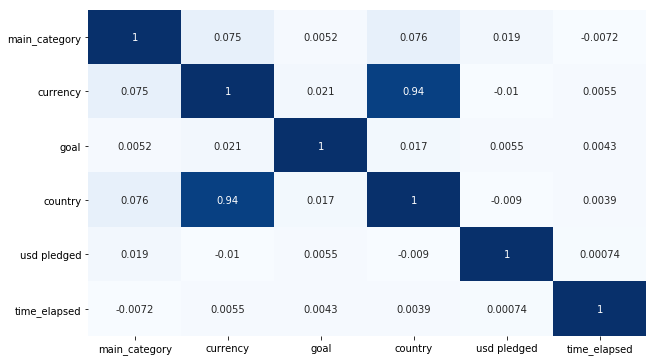

In [116]:
# corr = df2018.corr()
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr, cbar=None, annot=True, cmap='Blues')
# plt.show()
showCorr(df2018)

In [117]:
def showPairPlot(df):
    sns.pairplot(df)
    plt.show()

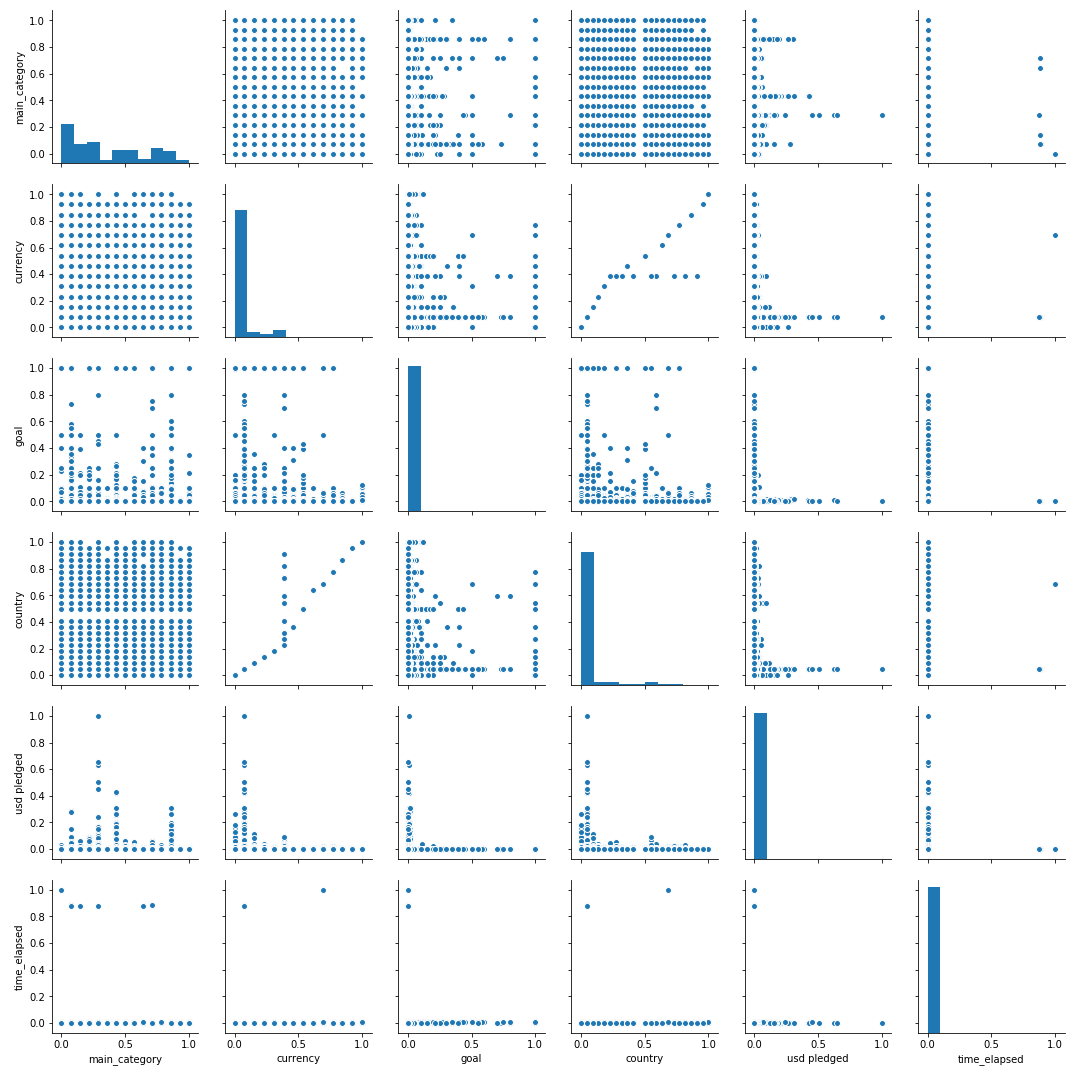

In [118]:
# sns.pairplot(df2018)
# plt.show()
showPairPlot(df2018)

In [119]:
df2018_copy.head()

,main_category,currency,goal,state,country,usd pledged,time_elapsed
0,0,0,1000.0,0,0,0.0,1403.0
1,1,1,30000.0,0,1,100.0,1435.0
2,1,1,45000.0,0,1,220.0,1079.0
3,2,1,5000.0,0,1,1.0,716.0
4,1,1,19500.0,1,1,1283.0,1335.0


In [120]:
df2018_copy2 = df2018_copy

In [128]:
df2018_copy = df2018_copy2

In [124]:
df2018_copy.dropna()
stateColumn = df2018_copy[label_column]
df2018_copy = df2018_copy.drop([label_column], axis=1)

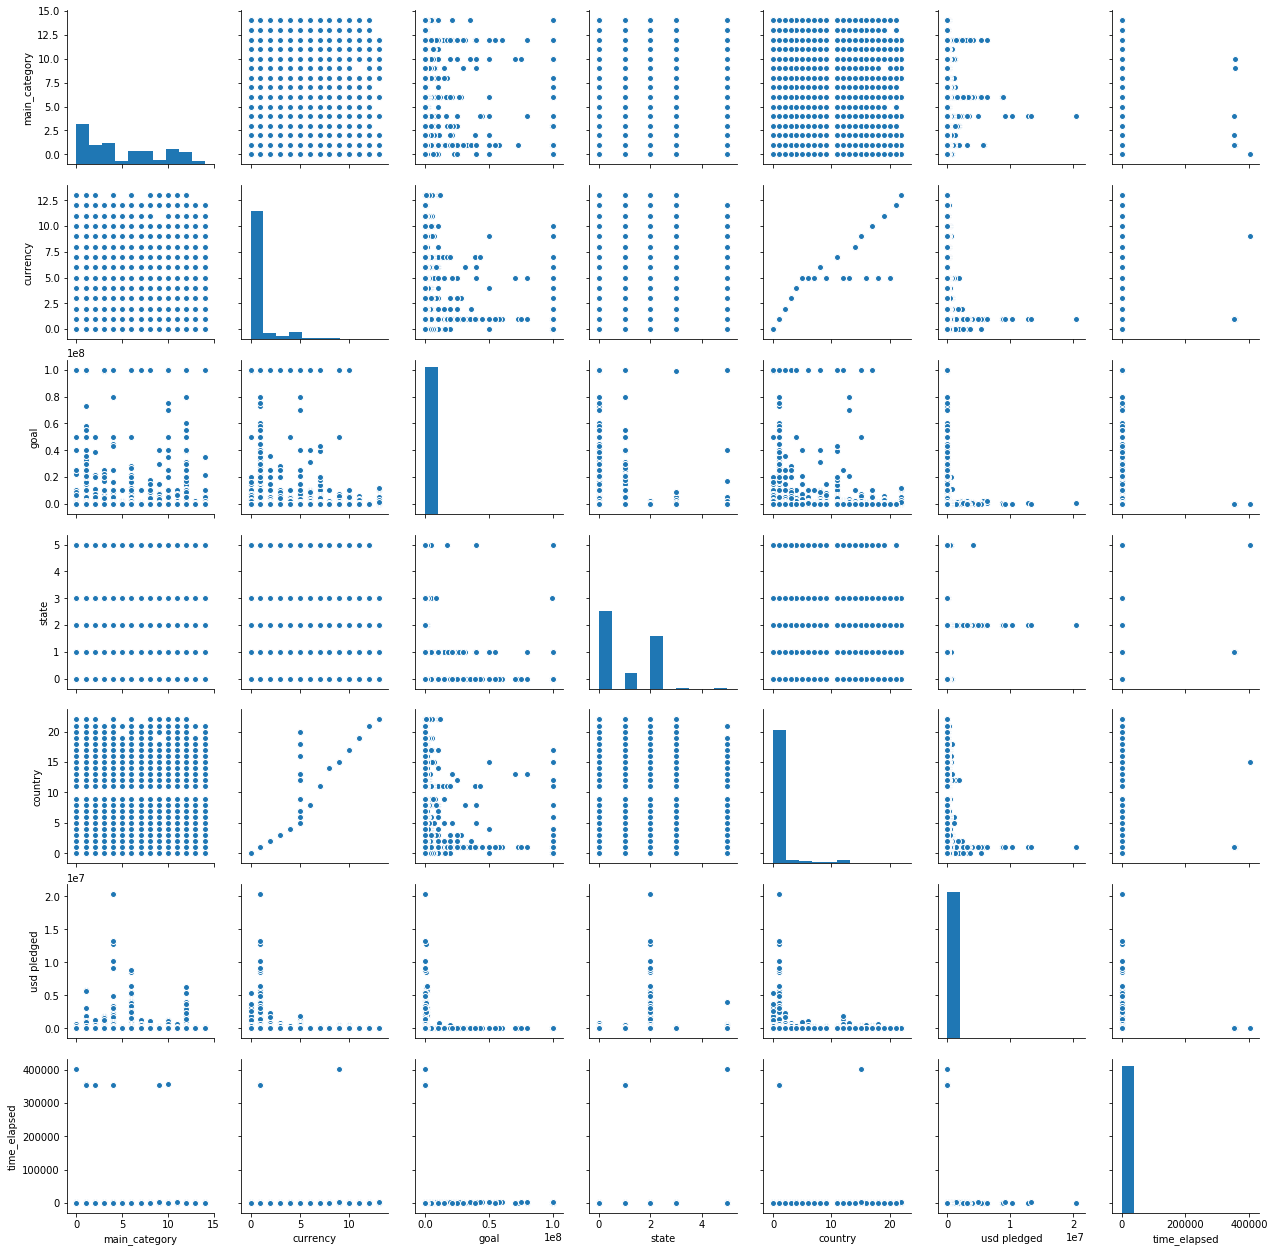

In [129]:
# sns.pairplot(df2018_copy)
# plt.show()
# df2018_copy.dropna()
# df2018_copy = normalizeDF(df2018_copy)
# df2018_copy = df2018_copy.join(stateColumn)

# df2018_copy = normalizeDF(df2018_copy)
showPairPlot(df2018_copy)

In [130]:
df2018_copy.head()

,main_category,currency,goal,state,country,usd pledged,time_elapsed
0,0,0,1000.0,0,0,0.0,1403.0
1,1,1,30000.0,0,1,100.0,1435.0
2,1,1,45000.0,0,1,220.0,1079.0
3,2,1,5000.0,0,1,1.0,716.0
4,1,1,19500.0,1,1,1283.0,1335.0


In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(df2018_copy)
X=scaler.transform(df2018_copy)    

pca = PCA()
x_new = pca.fit_transform(X)

In [136]:
x_new

array([[-1.17284819e+00, -8.09751080e-01, -8.95044484e-02, ...,
        -4.46119930e-01,  8.22056931e-01,  2.32417291e-01],
       [-3.96025789e-01, -7.71287831e-01, -3.57513606e-02, ...,
        -3.37264894e-01,  7.59875125e-01,  7.32507997e-04],
       [-3.97216848e-01, -7.46187715e-01, -1.20934552e-01, ...,
        -4.45295302e-01,  7.85299432e-01,  5.09179210e-04],
       ...,
       [-3.97892492e-01, -7.46135176e-01, -1.40587043e-01, ...,
        -4.30432295e-01,  7.86793004e-01,  4.53318725e-04],
       [-9.87595268e-02, -6.12591401e-01,  5.34572378e-01, ...,
         1.28449374e+00,  5.38589412e-02, -1.99572146e-03],
       [-1.54092269e-01, -6.23717468e-01,  3.69705816e-01, ...,
         9.42641981e-01,  2.01068515e-01, -1.67016804e-03]])

In [137]:
from sklearn.decomposition import PCA
import visuals as vs


pca2 = PCA(n_components=len(df2018.columns))
pca2.fit(df2018)

# Generate PCA results plot
pca_results = vs.pca_results(df2018, pca2)

ImportError: No module named visuals

In [76]:
# print "plot scatter"
# pd.plotting.scatter_matrix(df2018, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

    First, let's try using a linear model.

In [138]:
X = np.array(df2018)
# y = df2018[label_column].shift(-shift_param)
y = y_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)

print "Starting..."

# clf = LinearRegression()
clf = sk.LogisticRegression()
clf.fit(X_train, y_train)

print "Finished!"

print clf.score(X_test, y_test)

Starting...
Finished!
0.5311245381670735


In [139]:
print len(X)

374864


    What I tried to do next was to separate some data to test the model with information that it (the model) had never seen so we can attest for its generalization.

In [140]:
# X = preprocessing.scale(X)

shift_param = int(math.ceil(len(X)*0.1))
X_predict = X[~shift_param:]
y_predict = y[~shift_param:]
X = X[:~shift_param+1]
y = y[:~shift_param+1]

#Again slicing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)
clf.fit(X_train, y_train)

print clf.score(X_test, y_test)

0.5296253482719782


In [141]:
print len(X)

337377


In [142]:
y_predictions = clf.predict(X_predict)

print clf.score(X_predict, y_predict)

0.5316367904396073


    Now, let's try using a non-linear model to see how we can have better conclusions about our data.

In [143]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)

predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.44163938158015237


In [81]:
my_predictions = my_model.predict(X_predict)
print("Mean Absolute Error : " + str(mean_absolute_error(my_predictions, y_predict)))

Mean Absolute Error : 0.323270596053437


In [82]:
from sklearn.neural_network import MLPClassifier

newClf = MLPClassifier(alpha=1)

newClf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [83]:
newClf.score(X_test, y_test)

0.5264242100895133

In [86]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [87]:
score = mlp.score(X_test, y_test)
print score

0.5302071985311334
